In [48]:
import os
import random
import shutil

def create_mini_version(input_folder, output_folder, percentage=5):
    try:
        print("hello")
        # Create the output folder if it doesn't exist
        os.makedirs(output_folder, exist_ok=True)

        # Get the list of files in the input folder
        files = os.listdir(input_folder)
        # remove .DS_Store
        files.remove('.DS_Store')

        print(files)

        for file in files:
            no_of_files = len(os.listdir(os.path.join(input_folder, file)))

            num_files_to_select = int(no_of_files * (percentage / 100.0))


            selected_files = random.sample(os.listdir(os.path.join(input_folder, file)), num_files_to_select)

            print(f"selected files in {file} is {selected_files}")

            for selected_file in selected_files:
                source_path = os.path.join(input_folder, file, selected_file)
                # create folder if not exists
                os.makedirs(os.path.join(output_folder, file), exist_ok=True)
                
                destination_path = os.path.join(output_folder, file, selected_file)
                print("Copying file from {} to {}".format(source_path, destination_path))
                shutil.copyfile(source_path, destination_path)

        # print(files)
        

        # # Calculate the number of files to select
        # num_files_to_select = int(len(files) * (percentage / 100.0))
        # print("Number of files to select: {}".format(files))
        # # Randomly select files
        # selected_files = random.sample(files, num_files_to_select)

        # # Copy selected files to the output folder
        # for file_name in selected_files:
        #     source_path = os.path.join(input_folder, file_name)
        #     destination_path = os.path.join(output_folder, file_name)
        #     print("Copying file from {} to {}".format(source_path, destination_path))
        #     shutil.copyfile(source_path, destination_path)
    except Exception as e:
        print("Error occurred while creating the mini version of the dataset")
        print(e)



In [49]:
# Example usage
input_folder = "/Volumes/Project-2/programming/machine_deep_learning/DL-project/data/New Plant Diseases Dataset(Augmented)/train/"
output_folder = "/Volumes/Project-2/programming/machine_deep_learning/DL-project/data/mini_version/train/"
create_mini_version(input_folder, output_folder, percentage=1)


hello
['Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_mosaic_virus', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']
selected files in Pepper,_bell___Bacterial_spot is ['afc76c77-fd2d-4b7f-b1ad-14ba4d5fe297___NREC_B.Spot 9113.JPG', 'ead27319-4073-490e-80a0-08e916bbc1f2___JR_B.Spot 9084_flipTB.JPG', '1b73d0ec-bad1-4d2d-878e-6aa209aa39d2___JR_B.Spot 9086.JPG', '697e19e9-b11b-4bc8-884b-e25d432b90f6___NREC_B.Spot 9206.JPG', '656dbf3a-3aee-46a5-80b9-a86953fc82c5___JR_B.Spot 8879.JPG', 'e0b8d24b-c115-49d8-8e87-67f35681d181___JR_B.Spot 8877_180deg.JPG', '4aa16bda-c8f4-40b1-9f68-16bc936e6e9e___JR_B.Spot 3157.JPG', 'b5d5a42e-5d4f-4429-8923-aee42e0a0c5d___NREC_B.Spot 9189.JPG', '311c06b4

In [2]:
%pip install pandas_profiling

Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install ydata-profiling

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd

df=pd.read_csv('./data/csv/LeafDisease-1.csv')

df.head()   

,id,leaf_family,file_path
0,0022d6b7-d47c-4ee2-ae9a-392a53f48647___JR_B.Sp...,"Pepper,_bell___Bacterial_spot",./data/New Plant Diseases Dataset(Augmented)/t...
1,00f2e69a-1e56-412d-8a79-fdce794a17e4___JR_B.Sp...,"Pepper,_bell___Bacterial_spot",./data/New Plant Diseases Dataset(Augmented)/t...
2,01613cd0-d3cd-4e96-945c-a312002037bf___JR_B.Sp...,"Pepper,_bell___Bacterial_spot",./data/New Plant Diseases Dataset(Augmented)/t...
3,01613cd0-d3cd-4e96-945c-a312002037bf___JR_B.Sp...,"Pepper,_bell___Bacterial_spot",./data/New Plant Diseases Dataset(Augmented)/t...
4,01613cd0-d3cd-4e96-945c-a312002037bf___JR_B.Sp...,"Pepper,_bell___Bacterial_spot",./data/New Plant Diseases Dataset(Augmented)/t...


In [16]:
#New Plant Diseases Dataset(Augmented) replace with PlantLeafMain
df['file_path']=df['file_path'].apply(lambda x: x.replace('New Plant Diseases Dataset(Augmented)/train/','PlantLeafMain/train/'))

In [8]:
import numpy as np
class_names=np.unique(df['leaf_family'])
class_names

array(['Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy',
       'Potato___Early_blight', 'Potato___Late_blight',
       'Potato___healthy', 'Tomato___Bacterial_spot',
       'Tomato___Early_blight', 'Tomato___Late_blight',
       'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot',
       'Tomato___Spider_mites Two-spotted_spider_mite',
       'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
       'Tomato___Tomato_mosaic_virus', 'Tomato___healthy'], dtype=object)

# testing model with real data

In [11]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt

In [2]:
# Create a function to load a trained model
def load_model(model_path):
  """
  Loads a saved model from a specified path.
  """
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [37]:
model=load_model("./models/20231118-19071700314627-21k-images-resnet50v2-Adam.h5")


Loading saved model from: ./models/20231118-19071700314627-21k-images-resnet50v2-Adam.h5


In [39]:
IMG_SIZE=224

In [40]:
# lets createthe function to process the image

def process_image(image_path,img_size=IMG_SIZE):
   """
  Takes an image file path and turns the image into a tensor
  """

   # read the iamge file
   image_file=tf.io.read_file(image_path)

   # Turn jpeg image into numerical tensor with 3 colours channels (Red,blue,Green)

   image=tf.image.decode_jpeg(image_file,channels=3)

   # Normalize the value from 0-255 to 0-1
   image=tf.image.convert_image_dtype(image,tf.float32)

  # Resize the image
   image=tf.image.resize(image,size=[img_size,img_size])

   return image

In [22]:
def load_and_pred_image(filename,img_shape=224):
  """
  Read an image from filename, turns it inot a tensor and resize the shape to (img_shape,img_shape,color_channels)
  """

  # read in the imge
  img=tf.io.read_file(filename)

  # decode the image
  img=tf.image.decode_image(img)

  # resize the image

  img_resize=tf.image.resize(img,size=[img_shape,img_shape])

  # rescale the image
  img_rescale=img_resize/255.

  return img_rescale

In [27]:
# Turn our numerical prediction - Text lbel

def get_prediction_label(pred_proba):
  """
  Turns an array of prediction probilities into a lable
  """
  return class_names[pred_proba.argmax()]



In [44]:
def pred_and_plot(model,filename:str,class_names=class_names):
  """
  imports an image with given filename , make prediction with model and
  plots the image with the predicted class as the title
  """

  # import the target iamge and preprocess it

  img=process_image(filename)

  # make preictions

  pred=model.predict(tf.expand_dims(img,axis=0))

  # get the predlabel
  pred_label=get_prediction_label(pred[0])

  plt.imshow(img)
  plt.axis("off")

  #set the title

  plt.title(f"Prediction : {pred_label}",color="purple")

  


In [55]:
import matplotlib.pyplot as plt
import numpy as np

def plot_prediction(model, image):
    """
    View the prediction, ground truth, and image for n samples.
    """
    # Get the prediction probabilities, ground truth labels and images on the n samples
    img=process_image(image)

    pred_prob = model.predict(tf.expand_dims(img, axis=0))[0]

    # Get the pred label

    pred_label=get_prediction_label(pred_prob)

    print(pred_prob)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # Plot the image
    ax1.imshow(img)
    ax1.axis('off')
    ax1.set_title(f'Prediction: {pred_label}')

    # Display the top 5 prediction probabilities as a bar chart
    top5_indices = np.argsort(pred_prob)[::-1][:5]
    top5_labels = [class_names[i] for i in top5_indices]
    top5_probs = pred_prob[top5_indices]
    ax2.barh(np.arange(5), top5_probs, color='purple')
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(5))
    ax2.set_yticklabels(top5_labels, size='small')
    ax2.set_xlim(0, 1.1)
    ax2.set_xlabel('Prediction Probability')
    ax2.set_title('Top 5 Predictions')

    # If correct prediction, change the color of the title to green


    plt.tight_layout()
    plt.show()





1/1 [==============================] - 0s 80ms/step
[9.4724019e-06 4.4977213e-09 1.7726289e-02 7.5245686e-02 7.7973439e-10
 2.9921165e-07 7.4844646e-01 1.5613206e-01 2.2516504e-08 2.4326863e-03
 6.1718964e-08 9.8068904e-07 4.6714322e-06 1.7000531e-08 1.3324783e-06]


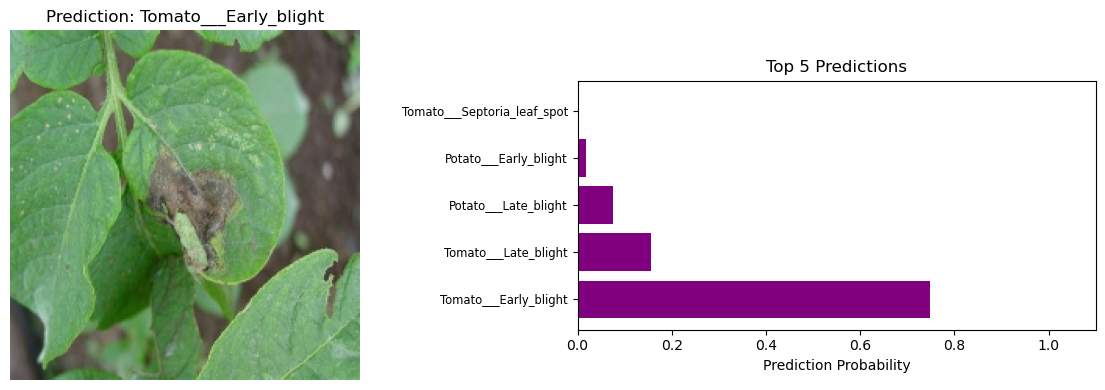

In [61]:
plot_prediction(model,'/Volumes/Project-2/programming/machine_deep_learning/DL-project/data/New Plant Diseases Dataset(Augmented)/test/test/late.jpeg')